In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import csv

In [ ]:
#!cd data; tar -xzf GSE171892_RAW.tar

# Preparing heart data

In [3]:
adataH = sc.read_h5ad("data/Global_raw.h5ad")
adataH #not normalised

AnnData object with n_obs × n_vars = 704296 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', 'donor_t

In [ ]:
test=adataH.X[-30:-1, -30:-1]
test.toarray()

In [4]:
adataH.var[:5]

,gene_name-new,gene_name_scRNA-0-original,gene_name_snRNA-1-original,gene_name_multiome-2-original
ENSG00000243485,MIR1302-2HG,MIR1302-2HG,MIR1302-2HG,MIR1302-2HG
ENSG00000237613,FAM138A,FAM138A,FAM138A,FAM138A
ENSG00000186092,OR4F5,OR4F5,OR4F5,OR4F5
ENSG00000238009,AL627309.1,AL627309.1,AL627309.1,AL627309.1
ENSG00000239945,AL627309.3,AL627309.3,AL627309.3,AL627309.3


In [4]:
adataH.var['gene_name-new']=adataH.var['gene_name-new'].astype('object')

In [5]:
adataH.var['ensemblid']=adataH.var.index
adataH.var.set_index('gene_name-new',drop=False, inplace=True)

In [7]:
adataH.var.index.name = None

In [ ]:
adataH.var[:5]

In [6]:
adataH.var_names_make_unique()

In [ ]:
adataH.var.dtypes

In [ ]:
adataH.obs

# Preparing Brain Data

In [7]:
#adataB = sc.read_h5ad("data/aldinger20.processed.h5ad") #normalised
adataB = sc.read_h5ad("data/Reference_MTG_RNAseq_all-nuclei.2022-06-07.h5ad")
adataB  #adataB=adataB.raw.to_adata()

AnnData object with n_obs × n_vars = 166868 × 36601
    obs: 'sample_name', 'donor_sex_label', 'external_donor_name_label', 'species_label', 'age_label', 'region_label', 'cortical_layer_label', 'full_genotype_label', 'QCpass', 'cluster_label', 'cluster_confidence', 'subclass_label', 'subclass_confidence', 'class_label', 'class_confidence', 'GA_QCpass', 'GA_cluster_label', 'GA_subclass_label', 'GA_neighborhood_label', 'CA_QCpass', 'CA_cluster_label', 'CA_subclass_label', 'CA_neighborhood_label', 'cluster_color', 'cluster_order', 'subclass_color', 'subclass_order', 'class_color', 'class_order', 'GA_cluster_color', 'GA_cluster_order', 'GA_subclass_color', 'GA_subclass_order', 'CA_cluster_color', 'CA_cluster_order', 'CA_subclass_color', 'CA_subclass_order', 'cell_type_accession_label'

In [ ]:
test=adataB.X[-30:-1, -30:-1]
test.toarray()

In [8]:
adataB.var['hello']='hello'

In [ ]:
adataB.var[:5]

In [ ]:
adataB.var.index

In [9]:
adataB.var_names_make_unique()

In [ ]:
adataB.var

In [ ]:
adataB.obs

# Merging 

In [24]:
#adatas = [adataH, adataB]
#adatas = ad.concat(adatas, index_unique=None,fill_value=0, join="inner") 

In [10]:
adatas = {"adataH": adataH, "adataB": adataB}
adatas = ad.concat(adatas, label="dataset_name", fill_value=0,  join="outer")

In [11]:
adatas

AnnData object with n_obs × n_vars = 871164 × 36609
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'sample_name', 'donor_sex_label', 'external_donor_name_label', 'species_label', 'age_label', 'region_label', 'cortical_layer_label', 'full_genotype_label', 'QCpass', 'cluster_label', 'cluster_confidence', 'subclass_label', 'subcla

In [12]:
adatas.var_names_make_unique()

In [ ]:
adatas.var.index[32731]

In [13]:
adatas2 = adatas

In [14]:
adatas2

AnnData object with n_obs × n_vars = 871164 × 36609
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'sample_name', 'donor_sex_label', 'external_donor_name_label', 'species_label', 'age_label', 'region_label', 'cortical_layer_label', 'full_genotype_label', 'QCpass', 'cluster_label', 'cluster_confidence', 'subclass_label', 'subcla

In [16]:
sc.pp.normalize_total(adatas2, target_sum=1e4)

In [17]:
sc.pp.log1p(adatas2)

In [18]:
del adatas2.obs['GA_QCpass']

In [19]:
del adatas2.obs['CA_QCpass']

In [ ]:
adatas2

In [20]:
adatas2.write('heart_brainnuclei.h5ad', compression='gzip')

# Data manipulaton and location labelling

In [ ]:
adatas2 = sc.read_h5ad("data/heart_brainnuclei.h5ad")

In [ ]:
DDP = pd.read_csv("geneVSorgans.csv")

In [ ]:
#sc.pl.umap(adatas2, color='cell_type')

In [21]:
pbmcgen = adatas2.var_names.tolist()
dddgen = DDP["gene symbol"].tolist()

# Calculate the number of overlapping genes
overlap_count = len(set(pbmcgen).intersection(dddgen))

print("Number of overlapping genes:", overlap_count)

Number of overlapping genes: 2296


In [22]:
genes = list(DDP['gene symbol'])

In [23]:
# Filter rows for Skin
Skin =  DDP.loc[DDP['Skin']==True]
Skin = Skin["gene symbol"]
Skin = list(Skin)

# Filter rows for Nervous
Nervous = DDP.loc[(DDP['Peripheral'] == True) | (DDP['Brain'] == True)]
Nervous = Nervous["gene symbol"]
Nervous = list(Nervous)  

# Filter rows for Musco
Musco = DDP.loc[(DDP['Skeleton'] == True) | (DDP['Musculature'] == True)]
Musco = Musco["gene symbol"]
Musco = list(Musco)  

# Filter rows for Circulatory
Circulatory = DDP.loc[(DDP['Heart'] == True) | (DDP['Bone Marrow'] == True)]
Circulatory = Circulatory["gene symbol"]
Circulatory = list(Circulatory) 

In [24]:
dict1 = {
    'Muscoskeletal' : Musco,
}
dict2 = {
    'Skin' : Skin,
}
dict3 = {
    'Nervous' : Nervous,
}
dict4 = {
    'Circulatory' : Circulatory
}

In [25]:
dictF = {
    'Muscoskeletal' : [v for v in dict1['Muscoskeletal'] if v in adatas2.var_names],
    'Skin' : [v for v in dict2['Skin'] if v in adatas2.var_names],
    'Nervous' : [v for v in dict3['Nervous'] if v in adatas2.var_names],
    'Circulatory' : [v for v in dict4['Circulatory'] if v in adatas2.var_names]
}

In [26]:
dictN = {
    'Nervous' : [v for v in dict3['Nervous'] if v in adatas2.var_names]
}
dictS = {
    'Skin' : [v for v in dict2['Skin'] if v in adatas2.var_names]
}
dictM = {
    'Muscoskeletal' : [v for v in dict1['Muscoskeletal'] if v in adatas2.var_names]
}
dictC = {
    'Circulatory' : [v for v in dict4['Circulatory'] if v in adatas2.var_names]
}

# Plotting

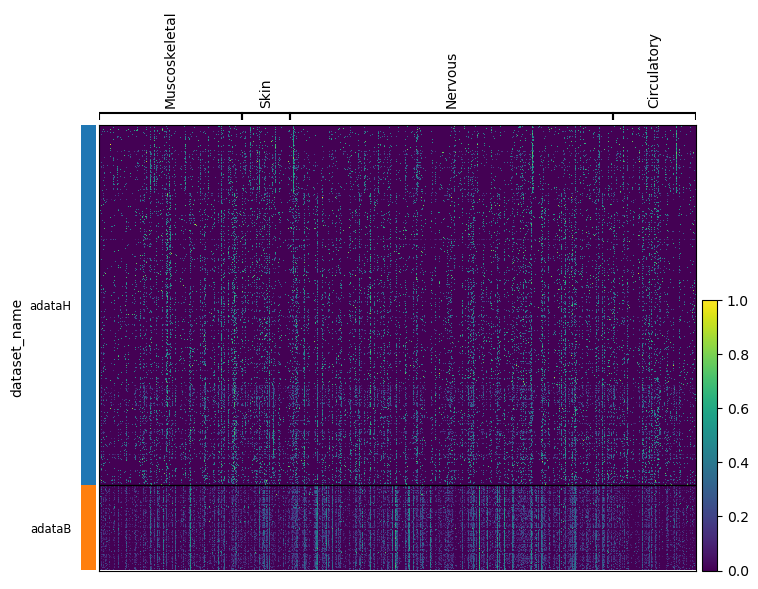

In [29]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictF, standard_scale='var', save="V3FULL.pdf")

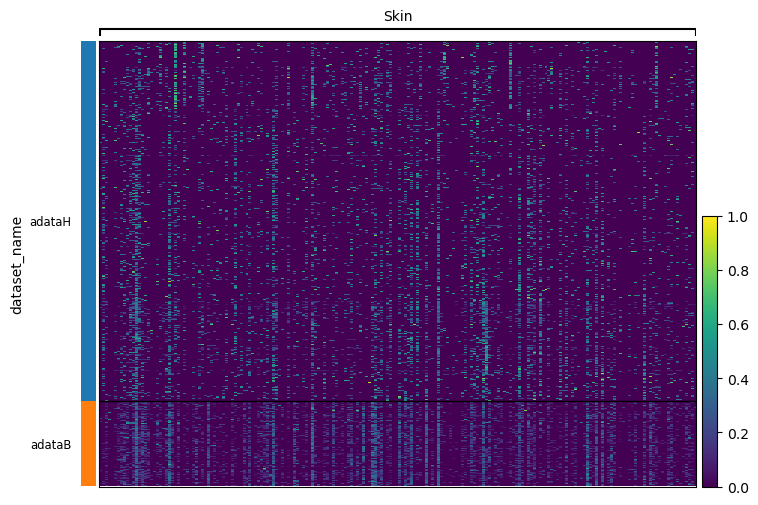

In [31]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictS, standard_scale='var', show_gene_labels=False, save="V3Skin.pdf")

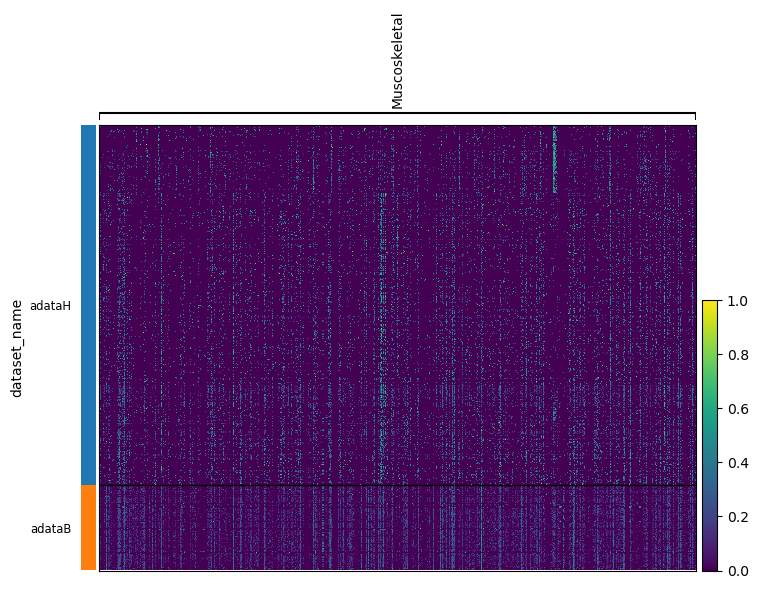

In [33]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictM, standard_scale='var', show_gene_labels=False, save="V3Musco.pdf")

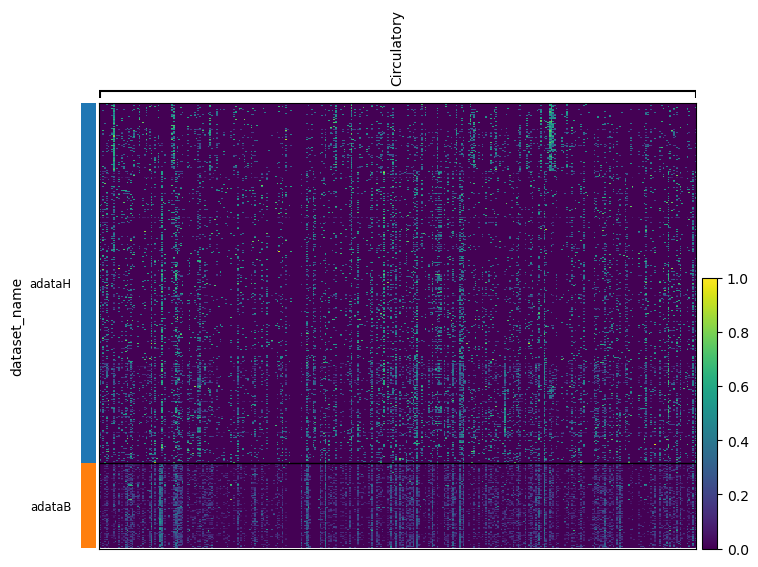

In [34]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictC, standard_scale='var', show_gene_labels=False, save="V3Circulatory.pdf")

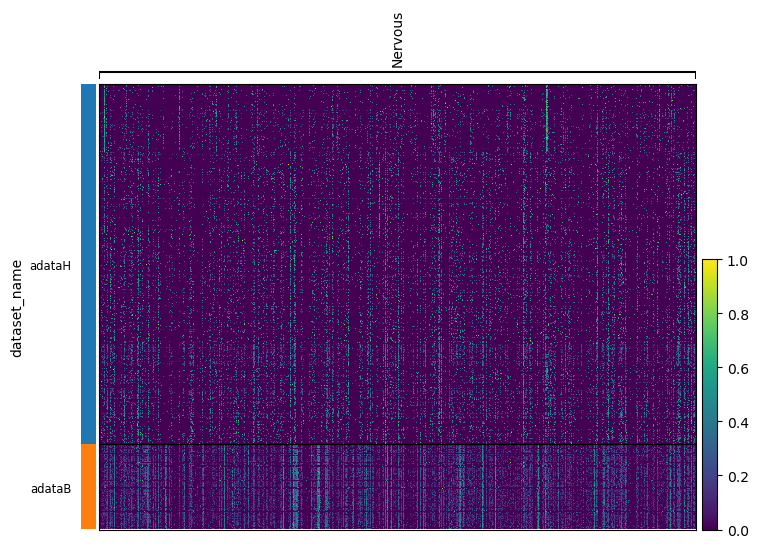

In [36]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictN, standard_scale='var', show_gene_labels=False, save="V3Nervous.pdf")

In [ ]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictF, standard_scale='var', save="V3FULLDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


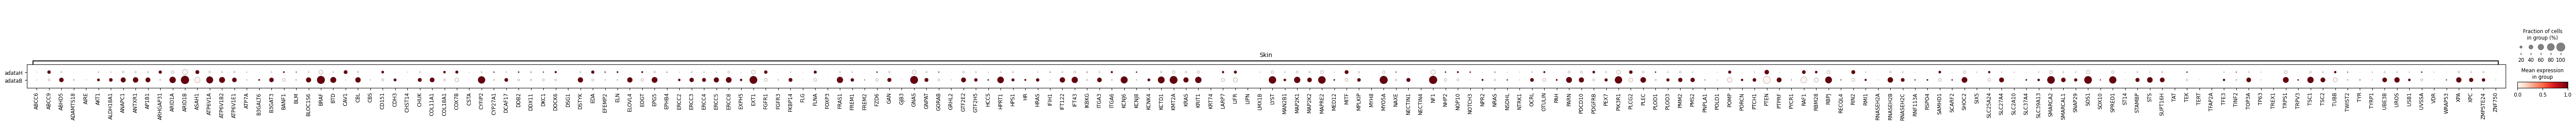

In [40]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictS, standard_scale='var', save="V3SkinDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


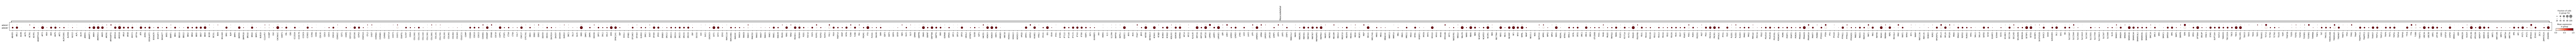

In [41]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictM, standard_scale='var', save="V3MuscDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


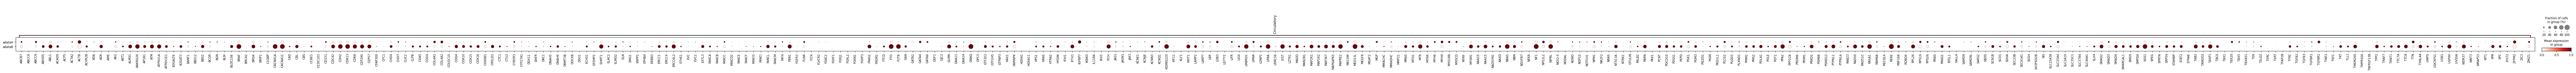

In [42]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictC, standard_scale='var', save="V3CircDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


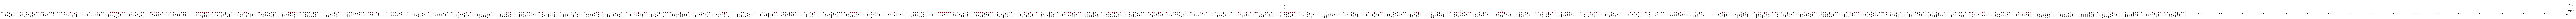

In [43]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictN, standard_scale='var', save="V3NervousDOT.pdf")